# Influential points: Leverages and Outliers

When conducting EDA, it is important to be aware that some data points can exert an outsized effect on statistical analysis, due to their position with respect to the overall sampling distribution. These data points are known as *influential* data points. In this lesson we will discuss the different types of influential data point, and how to handle them.

In [1]:
#@title ### Run the following cell to download the necessary files for this lesson { display-mode: "form" } 
#@markdown Don't worry about what's in this collapsed cell

!pip install -q seaborn
!pip install -q matplotlib
print('Downloading setup_script.py...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/a0e6fc59-46f5-4e1b-9f8a-046facdc2dfc/setup_script.py -q -O setup_script.py
import setup_script
print('Downloading dog_ages.csv...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/a0e6fc59-46f5-4e1b-9f8a-046facdc2dfc/dog_ages.csv -q -O dog_ages.csv



## Outliers
> *Outliers* are the "odd ones out" in a group of data. They are data points that differ markedly from the majority of other observations in a dataset. An **outlier** is defined by an unusual observation with respect to a given distribution, so technically can refer to an unusual observation in either the independent (x) or dependent variable (y). However typically the term **outlier** is used for unusual observations in the dependent variable, while the term *leverage* is used for an unusual observation in the independent variable.

Outlier values can arise either from intrinsic variability in the data, or potentially from errors in recording or measurement of the data, and they often warrant further investigation. You can also have outliers in just the y-dimension or in both dimensions simultaneously, in which case the data point is both an **outlier** and a **leverage**.

## Leverages
> **Leverages** are are data points that have an outsized influence on a statistical model due to their position or value in the x-axis distribution (i.e. the **independent**  or **predictor** variable). Their presence can disproportionately affect the outcome of an analysis. You might think of them like the "loud voices" in a dataset.

The code snippet below generates a plot of the relationship between the floor plan area and price of a sample of properties. The data point `5000, 500` is a leverage point, because it has a floor plan area that is a lot larger than the rest of the sample, even though it fits the trend perfectly.


<Axes: >

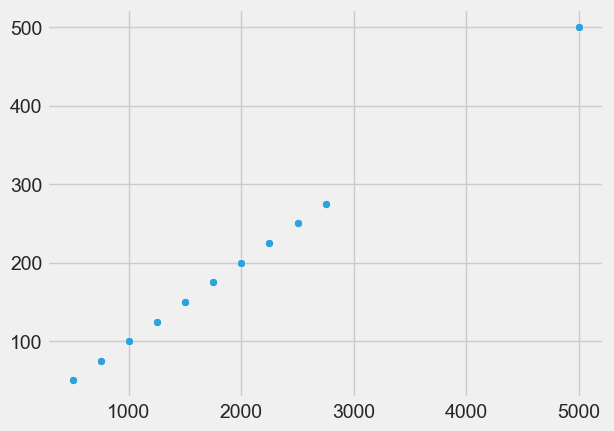

In [4]:
import seaborn as sns
floorplan_area = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 5000]
price_in_thousands = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]


sns.scatterplot(x=floorplan_area, y=price_in_thousands)

Leverages exert strong effects on statistical models for a variety of reasons:

1. **Position in Predictor Space**: Leverage points are typically extreme or distant from the mean of the predictor variables. Their "distance" from other data points means that they can pull or influence the regression line or plane more than other points. In the above example, removing the leverage point drastically affects the mean floor plan area of the sample.


In [5]:
floorplan_area = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 5000]
print("mean floorplan area with leverage: ", sum(floorplan_area)/len(floorplan_area))
print("mean floorplan area without leverage: ", sum(floorplan_area[:-1])/len(floorplan_area[:-1]))




mean floorplan area with leverage:  1931.8181818181818
mean floorplan area without leverage:  1625.0


2. **Influence on Slope and Intercept**: In linear regression, the goal is to find the best-fitting line that minimizes the sum of the squared residuals. A **leverage** point, due to its extreme position, can have a disproportionate effect on the slope and intercept of this line. Even if the leverage point's response value (Y-value) is broadly in line with the trend, its extreme predictor value (X-value) can change the direction or steepness of the regression line.

To illustrate this, let's make a small (10%) change to the price of the 5000 square-metre property, and see how it affects the regression:

slope of no leverage:  0.1
slope of leverage:  0.1111111111111111


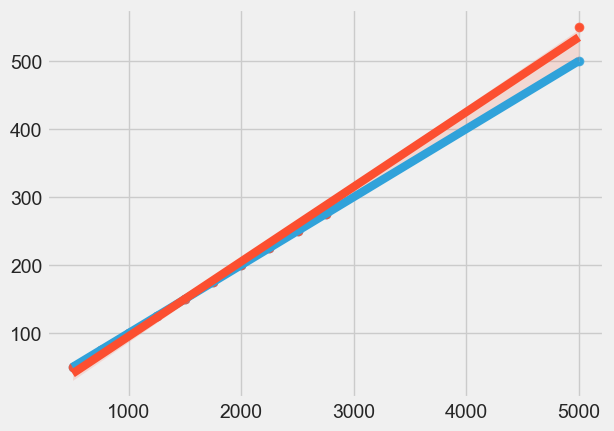

In [6]:
price_no_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]
price_leverage_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 550]

# plot both distributions
sns.scatterplot(x=floorplan_area, y=price_no_change)
sns.scatterplot(x=floorplan_area, y=price_leverage_change)

# fit a line to both distributions
sns.regplot(x=floorplan_area, y=price_no_change)
sns.regplot(x=floorplan_area, y=price_leverage_change)

# print the slope of both distributions
print("slope of no leverage: ", (price_no_change[-1]-price_no_change[0])/(floorplan_area[-1]-floorplan_area[0]))
print("slope of leverage: ", (price_leverage_change[-1]-price_leverage_change[0])/(floorplan_area[-1]-floorplan_area[0]))

As a counterexample, making the same magnitude change to a data point closer to the mean of the X-distribution has much less effect: 

slope of no leverage:  0.1
slope of leverage:  0.1


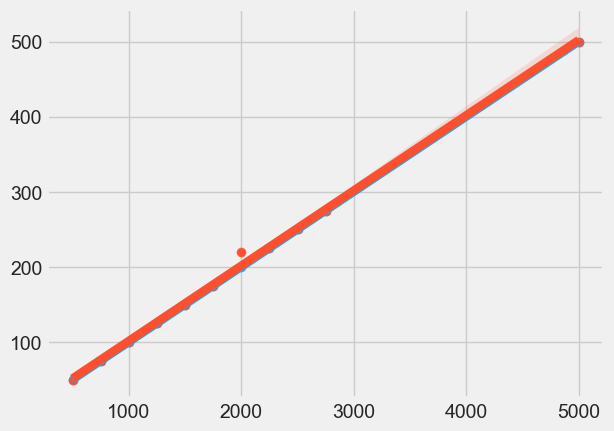

In [7]:
price_no_change = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 500]
price_leverage_change = [50, 75, 100, 125, 150, 175, 220, 225, 250, 275, 500]

# plot both distributions
sns.scatterplot(x=floorplan_area, y=price_no_change)
sns.scatterplot(x=floorplan_area, y=price_leverage_change)

# fit a line to both distributions
sns.regplot(x=floorplan_area, y=price_no_change)
sns.regplot(x=floorplan_area, y=price_leverage_change)

# print the slope of both distributions
print("slope of no leverage: ", (price_no_change[-1]-price_no_change[0])/(floorplan_area[-1]-floorplan_area[0]))
print("slope of leverage: ", (price_leverage_change[-1]-price_leverage_change[0])/(floorplan_area[-1]-floorplan_area[0]))

In general, the influence of a data point on a regression model is a function of its **residual** (the difference between its observed and predicted values) and its **leverage**. Even if a leverage point has a small **residual**, its high **leverage** can amplify its influence on the model.

## Y-dimension Outliers

Outliers in the y-dimension (i.e. the **dependent** variable) are very common, and their effect on statistical models is usually not as severe as an x-outlier. However when they are especially large, they can still affect the outcome of statistical analysis, and even a fairly small y-outlier can be influential if it is also a leverage.

The code block below generates a scatter plot and regression model for a small employment dataset, showing years of experience (YoE) against salary in 1000s:

slope of regression line:  5.037344602103992
Mean Squared Error (MSE) of the regression line:  20.0777220278863


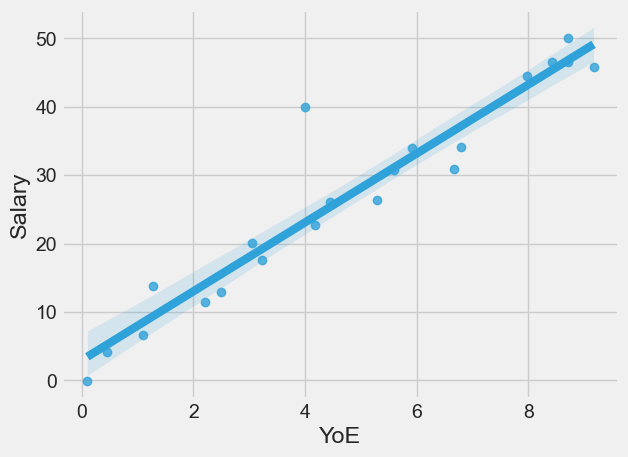

In [9]:
df_list = setup_script.df_list
from scipy.stats import linregress
import numpy as np


# fit a line to both distributions
sns.regplot(x=df_list[1]['YoE'], y=df_list[1]['Salary'])

# Compute the regression line parameters
slope, intercept, r_value, p_value, std_err = linregress(df_list[1]['YoE'], df_list[1]['Salary'])

# Predict the values using the regression line
predicted_values = slope * df_list[1]['YoE'] + intercept

# Compute the residuals
residuals = df_list[1]['Salary'] - predicted_values

# Compute the MSE
mse = np.mean(residuals**2)

# print the slope of the regression line
print("slope of regression line: ", slope)

# print the MSE of the regression line
print("Mean Squared Error (MSE) of the regression line: ", mse)



The point at `(4,40)` is an outlier in the y-axis. If we remove it and then re-do the regression,

For all data:
Slope of regression line:  5.037344602103992
Mean Squared Error (MSE) of the regression line:  20.0777220278863

For data without outlier:
Slope of regression line:  5.116869021677885
Mean Squared Error (MSE) of the regression line:  6.0465602738206


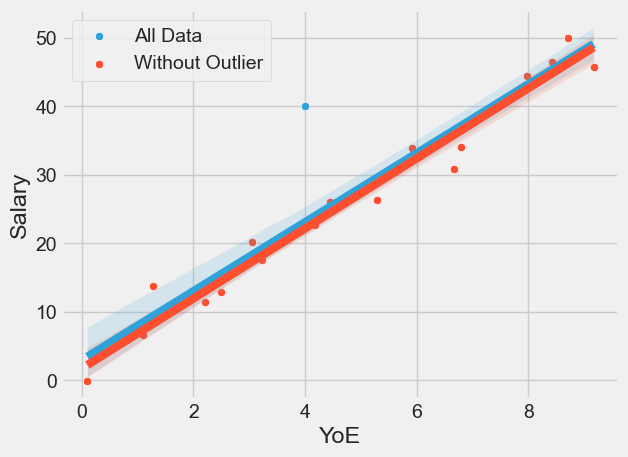

In [10]:

from scipy.stats import linregress

# Plotting scatter plots for both datasets
sns.scatterplot(x=df_list[1]['YoE'], y=df_list[1]['Salary'], label='All Data')
df_no_outlier= df_list[1].iloc[:-1]
sns.scatterplot(x=df_no_outlier['YoE'], y=df_no_outlier['Salary'], label='Without Outlier')

# Fit regression lines to both distributions
sns.regplot(x=df_list[1]['YoE'], y=df_list[1]['Salary'], scatter=False, label='Regression All Data')
sns.regplot(x=df_no_outlier['YoE'], y=df_no_outlier['Salary'], scatter=False, label='Regression Without Outlier')

# Compute regression parameters for all data
slope_all, intercept_all, _, _, _ = linregress(df_list[1]['YoE'], df_list[1]['Salary'])
predicted_all = slope_all * df_list[1]['YoE'] + intercept_all
mse_all = np.mean((df_list[1]['Salary'] - predicted_all)**2)

# Compute regression parameters for data without outlier
slope_no_outlier, intercept_no_outlier, _, _, _ = linregress(df_no_outlier['YoE'], df_no_outlier['Salary'])
predicted_no_outlier = slope_no_outlier * df_no_outlier['YoE'] + intercept_no_outlier
mse_no_outlier = np.mean((df_no_outlier['Salary'] - predicted_no_outlier)**2)

# Print the results
print("For all data:")
print("Slope of regression line: ", slope_all)
print("Mean Squared Error (MSE) of the regression line: ", mse_all)

print("\nFor data without outlier:")
print("Slope of regression line: ", slope_no_outlier)
print("Mean Squared Error (MSE) of the regression line: ", mse_no_outlier)


While the individual outlier did not have much effect on the slope of the regression, it drastically affected the mean squared error, and therefore the confidence of the prediction.

## Strategies for Detecting Outliers

### Visual Inspection

Visual inspection involves using simple graphical methods to spot unusual values or patterns in your data. By plotting the data, you can quickly see if there are any points that stand out or don't seem to fit with the rest.

#### Box Plots

Box plots visually represent the distribution of data based on a five-number summary, highlighting the median, quartiles, and potential outliers. Outliers are typically displayed as individual points outside the "whiskers" or ends of the box, allowing for easy identification of values that lie on the edges of the distribution.

Returning to our leverage point from the property dataset, we can see how a box plot readily identifies the leverage value:

/Users/georgehargrave/miniconda/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/georgehargrave/miniconda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


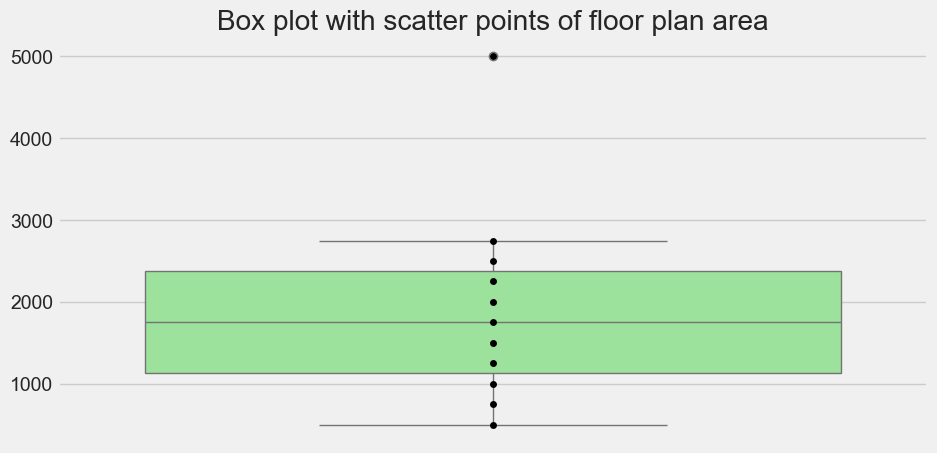

In [11]:
# Display a box plot with scatter points for Floorplan Area
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.boxplot(y=floorplan_area, color='lightgreen', showfliers=True)
sns.swarmplot(y=floorplan_area, color='black', size=5)
plt.title('Box plot with scatter points of floor plan area')
plt.show()

#### Histograms 

Histograms are graphical representations that display the frequency of data points across specified ranges, providing insights into the overall distribution of a dataset. In histograms, outliers can often be identified as isolated bars that are separated from the main cluster of data, indicating values that are significantly different from the majority.

/Users/georgehargrave/miniconda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/georgehargrave/miniconda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


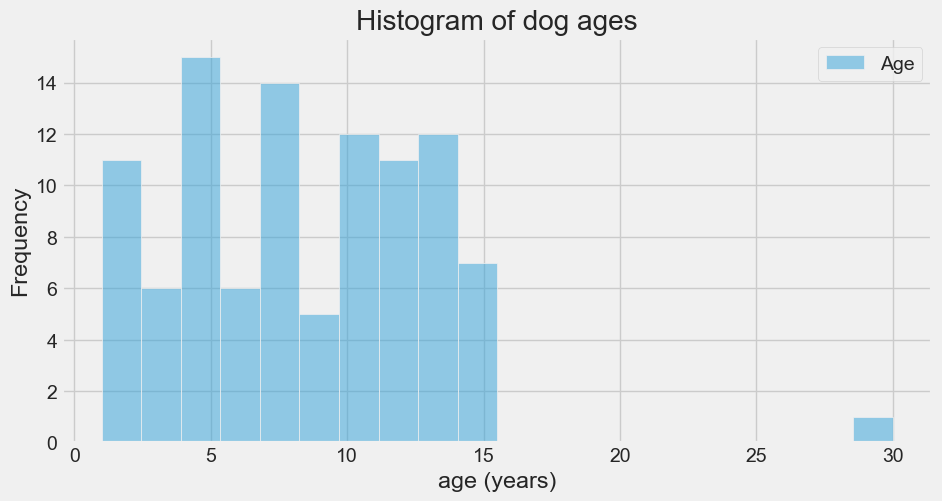

In [12]:
import pandas as pd
dog_ages = pd.read_csv("https://cdn.theaicore.com/content/lessons/2f2a6aee-4b86-4aea-bdee-962b61c3ddb4/dog_ages.csv")
plt.figure(figsize=(10, 5))
sns.histplot(dog_ages, bins=20, kde=False)
plt.title('Histogram of dog ages')
plt.xlabel('age (years)')
plt.ylabel('Frequency')
plt.show()

In the above histogram, we have a plot of a dataset of dog ages, with an outlier visible out to the right. 

#### Scatter Plots

Scatter plots are graphical representations that plot individual data points based on two variables, allowing for a visual examination of their relationship. By observing the dispersion of points in this two-dimensional space, one can easily spot and investigate any data points that deviate significantly from the general trend, indicating potential outliers.

<Axes: xlabel='YoE', ylabel='Salary'>

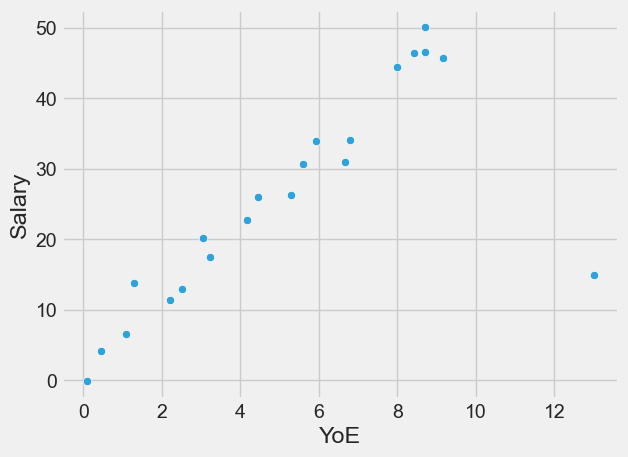

In [13]:
# Plotting scatter plots for both datasets
sns.scatterplot(x=df_list[3]['YoE'], y=df_list[3]['Salary'])

The plot above shows a different dataset for the YoE-Salary relationship. The rightmost point is a clear outlier in both the X and Y dimension.

### Statistical Methods for Outlier Detection

Statistical methods provide a quantitative approach to identifying outliers by applying mathematical rules and formulas to the data. These techniques, grounded in statistical theory, offer a systematic way to detect and handle anomalous values that might distort analyses.

#### Z-Score

The Z-Score is a statistical measurement that describes a data point's position relative to the mean of a group of values, measured in terms of standard deviations. Data points with a Z-Score having a high absolute value, typically beyond a threshold like 2 or 3, are often considered outliers as they significantly deviate from the average.

In [14]:
# Calculate the Z-Scores for YoE
mean_yoe = np.mean(dog_ages)
std_yoe = np.std(dog_ages)
z_scores_dog = (dog_ages - mean_yoe) / std_yoe
dog_ages_z = dog_ages
# Add th z-scores to the dataframe as a new column:
dog_ages_z['z_scores'] = z_scores_dog

# Show the last 10 rows of the dataframe
dog_ages_z.tail(10)


/Users/georgehargrave/miniconda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,Age,z_scores
90,6,-0.517109
91,6,-0.517109
92,10,0.327151
93,4,-0.939239
94,6,-0.517109
95,13,0.960345
96,15,1.382475
97,2,-1.361369
98,10,0.327151
99,30,4.548449


We can see that the outlier in the dog ages dataset has a Z-score of `4.5`, indicating that it is an outlier.

#### IQR (Interquartile Range)

The Interquartile Range (IQR) is a statistical measure that represents the range between the first quartile (25th percentile) and the third quartile (75th percentile) of a dataset. Values that fall below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR are typically classified as outliers, as they lie outside the common range of variability in the data.

In the case of our dog age outlier:

In [15]:
Q1 = dog_ages['Age'].quantile(0.25)
Q3 = dog_ages['Age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

# Identify outliers
outliers = dog_ages[(dog_ages['Age'] < (Q1 - 1.5 * IQR)) | (dog_ages['Age'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)

Q1 (25th percentile): 4.75
Q3 (75th percentile): 12.0
IQR: 7.25
Outliers:
    Age  z_scores
99   30  4.548449



### Proximity-Based Methods

   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: DBSCAN is a clustering algorithm that groups together closely packed data points based on their density, leaving sparser regions as noise or outliers. Unlike many other clustering methods, DBSCAN doesn't require specifying the number of clusters beforehand and can discover clusters of varying shapes, making it particularly effective at identifying anomalies in spatial data.
   
   - **Isolation Forest**: Isolation Forest is a tree-based ensemble method designed specifically for anomaly detection. It works by recursively partitioning the dataset in a way that isolates individual data points, with the idea that outliers are easier to isolate (and thus have shorter paths) than regular observations, allowing for efficient outlier detection in high-dimensional datasets.

### Robust Statistical Metrics

> Robust statistical metrics are measures designed to provide accurate and reliable insights into data, even when the data contains outliers or is skewed. Unlike traditional statistical measures, which can be heavily influenced by extreme values, robust metrics are less sensitive to such anomalies, ensuring consistent and trustworthy results in varied data conditions.

   - **MAD (Median Absolute Deviation)**: MAD is a robust measure of variability that calculates the median of the absolute deviations from the dataset's median. Unlike the standard deviation, which can be sensitive to extreme values, MAD is less influenced by outliers, making it a reliable metric to detect anomalies, especially in skewed distributions.
   
   - **Robust Regression**: Robust regression techniques, such as RANSAC (Random Sample Consensus), are designed to fit models to data while being resistant to outliers. Instead of minimizing the sum of squared residuals like traditional regression, these methods use alternative loss functions or fitting approaches to reduce the influence of anomalous data points, ensuring a more accurate fit in the presence of outliers.

### Domain-Specific Knowledge

Domain-specific knowledge refers to the expertise and understanding related to a particular field or area of study. Specialised knowledge of the subject can be invaluable in data analysis, as it provides context and a deeper understanding of what constitutes typical versus atypical data points. For example, in a dataset capturing human ages, while statistical methods might not always flag an age of 200 as an outlier, someone with knowledge of human lifespans would immediately recognize this value as an anomaly. Such domain insights can often catch outliers that purely mathematical methods might overlook.

## Handling Outliers

Once outliers have been detected in a dataset, the decision on how to handle them is crucial and can significantly impact the results of any subsequent analysis. The appropriate action often depends on the nature and source of the outliers, as well as the analytical task you are trying to perform. 

- **Remove**: If an outlier results from a clear error, such as a data entry mistake, it might be best to correct or remove it. In cases where the outlier is a genuine data point but not relevant to the current analysis, it might be set aside or treated separately. 

- **Keep**: If the outlier provides valuable information or indicates a new trend or phenomenon, it might be essential to keep and further investigate it. Sometimes, techniques like data transformation or robust statistical methods can be employed to reduce the influence of outliers without entirely discarding them. 

- **Replace**: If the outlier is the result of an obvious data entry error, it might be possible to correct it. For instance, if a person's age is mistakenly entered as 250 instead of 25, it's clear that the value should be corrected. 

## Outliers in Categorical Data

Outliers can also occur in categorical data, but they can be harder to detect because they are not amenable to algorithmic detection.

In most cases, the data in your dataset represent a **sample** of the total population. For example we might want to find out what proportion of people own different types of pets in London, by selecting random addresses and asking the residents to tell us what pets they own. Imagine we sampled 100 houses like this, and one of them just happened to have a pet capybara (a giant South American rodent). Our report might conclude that 1% of London households have pet Capybaras! However it is more likely that the capybara is an outlier, and the underlying rate is extremely low, maybe only one or two in the entire city, or around a ten-thousandth of a percent.

<p align="center">
    <img src="images/capybara.png"  width="800"/>
</p>
<br>

### Detecting Outliers in Categorical Data

1. **Frequency Analysis**: One of the simplest ways to detect outliers in categorical data is to conduct a frequency analysis. If a category appears very infrequently, it might be considered an outlier. In our example, if only one out of 100 households has a pet capybara, this could be flagged for further investigation.

2. **Domain Knowledge**: Sometimes, understanding the context or domain can help in identifying outliers. In the UK, the ownership of exotic pets is regulated under the Dangerous Wild Animals Act 1976. Anyone wishing to keep an animal listed under this act must obtain a license from their local authority. It is possible that Capybaras fall under that category, which would lead us to expect that they will be rarer than our sample suggests.

3. **Cross-Validation with Other Data Sources**: If available, cross-referencing your data with other similar datasets can help validate the presence of outliers. For instance, if another survey on pets in London doesn't mention capybaras at all, it might reinforce the idea that our capybara data point is an outlier.

4. **Grouping Categories**: In some cases, it might make sense to group less frequent categories into a broader "Other" category. This can help in reducing the impact of outliers on the analysis. However, it's essential to ensure that this doesn't mask important information.

5. **Resampling**: If you suspect that an outlier might be due to chance in a random sample, consider taking multiple samples or increasing the sample size. This can provide a clearer picture of the true distribution of categories in the population.

7. **Expert Review**: Sometimes, the best approach is to have domain experts review the data. They might provide insights into whether a data point is genuinely an outlier or if it's a valid, albeit rare, observation.

### Handling Categorical Outliers

After identifying potential outliers, you have a few options:

   - **Retain**: If you believe the outlier is a genuine representation of the population, you might choose to keep it
   - **Remove**: If you determine the outlier is due to an error or is not representative, you might decide to exclude it from the analysis
   - **Replace**: In some cases, it might make sense to replace the outlier category, especially if you believe it's due to an error. For example `capybara` could be replaced with `rodent (other)`, along with all the naked mole-rats and agoutis in the sample.

In conclusion, handling outliers in categorical data requires a combination of statistical techniques, domain knowledge, and careful judgment. It's essential to approach outliers critically, understanding their potential impact on the analysis and making informed decisions on how to address them.

## Key Takeaways

- **Influential** data points can greatly affect statistical analysis due to their position in the sampling distribution
- **Outliers** are unusual data points in a dataset, typically in the dependent variable, while **leverages** are unusual observations in the independent variable
- **Leverages** are extreme data points that can disproportionately affect statistical models due to their position in the predictor space and influence on slope and intercept
- **Outliers** can affect statistical analysis outcomes, especially if they are large or also a leverage point
- Visual inspection methods like box plots, histograms, and scatter plots can help identify outliers in data distributions
- **Outliers** can be identified using Z-Score and IQR methods, which measure deviation from the mean and range variability respectively
- Methods such as **DBSCAN** and **Isolation Forest**, and robust methods like **MAD** can be used to detect anomalies automatically
- Domain-specific knowledge can identify outliers that statistical methods might overlook
- **Outliers** can be handled by removing, keeping, or replacing them, depending on their source and relevance to the analysis
- **Outliers** in categorical data can skew results and are harder to detect due to their resistance to algorithmic detection
- **Outlier** detection in categorical data can involve frequency analysis, domain knowledge, cross-validation, grouping categories, resampling, and expert review

